# Telco Churn Prediction
![Churn](https://www.customerthermometer.com/img/Blog-12.jpg)

<strong><h2>İş Problemi</h2><p>
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi beklenmektedir..</p>
    
    
<strong><h2>Veri Seti Hikayesi</h2></strong>
<blockquote><p><strong> Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu gösterir.</strong></p>
</blockquote>
    
<br>
    

<li><strong>Değişken Sayısı : 21</strong></li>
<li><strong>Satır Sayısı : 7043</strong> </li>
<li><strong>CSV Dosya Boyutu : 977.5 KB</strong></li>

# 1. Kütüphaneler 🚚

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv")

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# 2. Veri Setine İlk Bakış 🔬

## 2.1 Klasik Yolla İlk Bakış 💽

In [11]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    display(dataframe.head(head))
    print("##################### Tail #####################")
    display(dataframe.tail(head))
    print("##################### NA #####################")
    display(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    display(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check          29.850        29.850      0
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check          56.950      1889.500      0
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check          53.850       108.150      1
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)          42.300      1840.750      0
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check          70.700       151.650      1

##################### Tail #####################


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
7038  6840-RESVB    Male              0     Yes        Yes      24          Yes               Yes             DSL            Yes           No              Yes         Yes         Yes             Yes        One year              Yes               Mailed check          84.800      1990.500      0
7039  2234-XADUH  Female              0     Yes        Yes      72          Yes               Yes     Fiber optic             No          Yes              Yes          No         Yes             Yes        One year              Yes    Credit card (automatic)         103.200      7362.900      0
7040  4801-JZAZL  Female              0     Yes        Yes      11           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month              Yes           Electronic check          29.600       346.450      0
7041  8361-LTMKD    Male              1     Yes         No       4          Yes               Yes     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes               Mailed check          74.400       306.600      1
7042  3186-AJIEK    Male              0      No         No      66          Yes                No     Fiber optic            Yes           No              Yes         Yes         Yes             Yes        Two year              Yes  Bank transfer (automatic)         105.650      6844.500      0

##################### NA #####################


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##################### Quantiles #####################


0.000  0.050    0.500    0.950    0.990    1.000
SeniorCitizen   0.000  0.000    0.000    1.000    1.000    1.000
tenure          0.000  1.000   29.000   72.000   72.000   72.000
MonthlyCharges 18.250 19.650   70.350  107.400  114.729  118.750
TotalCharges   18.800 49.605 1397.475 6923.590 8039.883 8684.800
Churn           0.000  0.000    0.000    1.000    1.000    1.000

## 2.2 EDA Library: **pandas-profiling** 🐼

Kurulum: **pip install ydata-profiling**

**DİKKAT!**: Kullanmak için Jupyter notebook gereklidir! (.ipynb)

In [12]:
!pip install ydata-profiling

In [13]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [14]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_notebook_iframe()

In [16]:
# raporu HTML olarak kaydetmek için
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### pandas-profiling Özellikleri
1. Büyük veri setleriyle çalışırken minimal=True argümanını kullanabiliriz.

In [17]:
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Büyük veriyle çalışırken diğer yol olarak veri setinden bir sample alınarak da ilerlenebilir.

In [18]:
# Büyük veri setleriyle çalışırken
sample = df.sample(5000)
profile_sample = ProfileReport(sample, minimal=True)

2. Veri setlerini karşılaştırmamıza da imkan verir. Elimizde train ve test veri setleri olsun, bunların karşılaştırmasını da yapabiliriz.

> Bu örnekte elimizde ayrı ayrı train-test olmadığı için kendi train ve test setlerimizi df içerisinden sample çekerek oluşturuyoruz.

In [19]:
from pandas_profiling import ProfileReport, compare
train = df.sample(4000)
test = df.sample(1000)

In [20]:
train_report = ProfileReport(train, title="Train")
test_report = ProfileReport(test, title="Test")
comparison_report = train_report.compare(test_report)
comparison_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Bunun gibi farklı farklı özellikleri dokümantasyonda bulabilirsiniz. Dokümantasyona ulaşmak için:

[Pandas-profiling Documentation](https://ydata-profiling.ydata.ai/docs/master/index.html)

***

Pandas-profiling'i grab_col_names ile birleştirmek istersek:

In [6]:
num_cols = df.drop("customerID", axis=1).select_dtypes(include="number").columns.tolist()
cat_cols = df.drop("customerID", axis=1).select_dtypes(exclude="number").columns.tolist()

In [7]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [8]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# 3. Model Kurulumu için Auto-ML Toolları
**LazyPredict**
> Kurulum: pip install lazypredict

**PyCaret**
> Kurulum: pip install pycaret

## 3.1 LazyPredict

Dokümantasyon: [Lazy Predict Documentation](https://lazypredict.readthedocs.io/en/latest/)

In [24]:
!pip install lazypredict

Verimizi modellerle çalıştırabilmek için kategorik değişkenleri encode işlemiyle numerik değişkenlere dönüştürmemiz gerekir. Aşağıda pratik olması ve farkların gözlemlenebilmesi açısından hem sadece One-Hot Encoder, hem sadece Label Encoder, hem de ikisinin kombinlenmesi uygulanmıştır.

In [25]:
# Sadece OHE uygulayarak Lazy Predict kullanmak
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

df_auto = df.drop("customerID", axis=1)
df_auto = pd.get_dummies(df_auto, drop_first=True)

X = df_auto.drop("Churn", axis=1)
y = df_auto["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
reg = LazyClassifier(verbose=-99, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:17<00:00,  1.70it/s]


In [26]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
BernoulliNB                        0.74               0.76     0.76      0.75        0.03
NearestCentroid                    0.70               0.76     0.76      0.72        0.04
QuadraticDiscriminantAnalysis      0.76               0.75     0.75      0.77        0.05
LogisticRegression                 0.82               0.75     0.75      0.82        0.10
AdaBoostClassifier                 0.82               0.75     0.75      0.82        0.36
LinearDiscriminantAnalysis         0.81               0.75     0.75      0.81        0.11
RidgeClassifierCV                  0.82               0.74     0.74      0.82        0.06
RidgeClassifier                    0.82               0.74     0.74      0.82        0.04
LinearSVC                          0.82               0.74     0.74      0.81        0.80
CalibratedClassifierCV             0.82               0.74     0.74      0.81        3.14
GaussianNB                         0.67               0.74     0.74      0.68        0.02
SVC                                0.81               0.72     0.72      0.81        1.78
LGBMClassifier                     0.80               0.72     0.72      0.80        1.24
PassiveAggressiveClassifier        0.76               0.71     0.71      0.76        0.04
XGBClassifier                      0.80               0.71     0.71      0.79        0.92
NuSVC                              0.81               0.69     0.69      0.79        2.01
KNeighborsClassifier               0.77               0.69     0.69      0.77        0.27
RandomForestClassifier             0.79               0.69     0.69      0.78        0.83
ExtraTreesClassifier               0.79               0.68     0.68      0.78        0.80
ExtraTreeClassifier                0.75               0.68     0.68      0.75        0.03
LabelSpreading                     0.74               0.67     0.67      0.74        2.15
LabelPropagation                   0.74               0.67     0.67      0.74        1.64
BaggingClassifier                  0.77               0.65     0.65      0.75        0.25
DecisionTreeClassifier             0.71               0.63     0.63      0.71        0.10
SGDClassifier                      0.77               0.60     0.60      0.72        0.15
Perceptron                         0.72               0.55     0.55      0.68        0.05
DummyClassifier                    0.74               0.50     0.50      0.62        0.02

Kendi uygulamak istediğimiz metriği de <ins>custom_metric</ins> argümanıyla verebiliriz.

In [27]:
# Sadece Label Encoder uygulayarak Lazy Predict kullanmak
# custom metric olarak f1_score kullanıyoruz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score 

df_auto = df.drop("customerID", axis=1)
for col in cat_cols:
    labelencoder = LabelEncoder()
    df_auto[col] = labelencoder.fit_transform(df_auto[col])

X = df_auto.drop("Churn", axis=1)
y = df_auto["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
reg = LazyClassifier(verbose=-99, ignore_warnings=True, custom_metric=f1_score)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:14<00:00,  1.97it/s]


In [28]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  f1_score  Time Taken
Model                                                                                              
QuadraticDiscriminantAnalysis      0.77               0.77     0.77      0.78      0.64        0.04
NearestCentroid                    0.72               0.76     0.76      0.74      0.62        0.04
GaussianNB                         0.76               0.76     0.76      0.77      0.63        0.02
BernoulliNB                        0.76               0.76     0.76      0.77      0.62        0.02
LinearSVC                          0.82               0.74     0.74      0.82      0.63        0.58
LinearDiscriminantAnalysis         0.82               0.74     0.74      0.81      0.63        0.07
CalibratedClassifierCV             0.82               0.74     0.74      0.82      0.63        1.74
LogisticRegression                 0.82               0.74     0.74      0.81      0.63        0.07
RidgeClassifier                    0.82               0.73     0.73      0.81      0.62        0.03
RidgeClassifierCV                  0.82               0.73     0.73      0.81      0.61        0.05
SGDClassifier                      0.80               0.73     0.73      0.80      0.60        0.13
LGBMClassifier                     0.80               0.72     0.72      0.80      0.59        0.64
AdaBoostClassifier                 0.80               0.72     0.72      0.80      0.59        0.35
SVC                                0.81               0.71     0.71      0.80      0.58        1.39
XGBClassifier                      0.80               0.71     0.71      0.79      0.57        1.27
RandomForestClassifier             0.79               0.69     0.69      0.78      0.55        0.83
NuSVC                              0.80               0.68     0.68      0.79      0.54        1.50
ExtraTreesClassifier               0.79               0.68     0.68      0.77      0.53        0.76
KNeighborsClassifier               0.76               0.68     0.68      0.75      0.52        0.25
BaggingClassifier                  0.78               0.68     0.68      0.77      0.52        0.23
LabelSpreading                     0.74               0.66     0.66      0.74      0.51        2.45
LabelPropagation                   0.73               0.66     0.66      0.73      0.50        1.96
ExtraTreeClassifier                0.73               0.66     0.66      0.73      0.50        0.02
DecisionTreeClassifier             0.73               0.66     0.66      0.73      0.50        0.09
PassiveAggressiveClassifier        0.73               0.64     0.64      0.73      0.47        0.03
Perceptron                         0.68               0.57     0.57      0.67      0.36        0.05
DummyClassifier                    0.74               0.50     0.50      0.62      0.00        0.02

In [29]:
# Sadece Label Encoder uygulayarak Lazy Predict kullanmak
# custom metric olarak MAE kullanmak
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

df_auto = df.drop("customerID", axis=1)
for col in cat_cols:
    labelencoder = LabelEncoder()
    df_auto[col] = labelencoder.fit_transform(df_auto[col])

X = df_auto.drop("Churn", axis=1)
y = df_auto["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
reg = LazyClassifier(verbose=-99, ignore_warnings=True, custom_metric=mean_absolute_error)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:14<00:00,  1.95it/s]


In [30]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  mean_absolute_error  Time Taken
Model                                                                                                         
QuadraticDiscriminantAnalysis      0.77               0.77     0.77      0.78                 0.23        0.05
NearestCentroid                    0.72               0.76     0.76      0.74                 0.28        0.04
GaussianNB                         0.76               0.76     0.76      0.77                 0.24        0.02
BernoulliNB                        0.76               0.76     0.76      0.77                 0.24        0.02
LinearSVC                          0.82               0.74     0.74      0.82                 0.18        0.59
LinearDiscriminantAnalysis         0.82               0.74     0.74      0.81                 0.18        0.07
CalibratedClassifierCV             0.82               0.74     0.74      0.82                 0.18        1.75
LogisticRegression                 0.82               0.74     0.74      0.81                 0.18        0.07
RidgeClassifier                    0.82               0.73     0.73      0.81                 0.18        0.03
RidgeClassifierCV                  0.82               0.73     0.73      0.81                 0.18        0.07
SGDClassifier                      0.80               0.73     0.73      0.80                 0.20        0.14
LGBMClassifier                     0.80               0.72     0.72      0.80                 0.20        0.65
AdaBoostClassifier                 0.80               0.72     0.72      0.80                 0.20        0.35
SVC                                0.81               0.71     0.71      0.80                 0.19        1.40
XGBClassifier                      0.80               0.71     0.71      0.79                 0.20        1.28
RandomForestClassifier             0.79               0.69     0.69      0.78                 0.21        0.88
NuSVC                              0.80               0.68     0.68      0.79                 0.20        1.53
ExtraTreesClassifier               0.79               0.68     0.68      0.77                 0.21        0.76
KNeighborsClassifier               0.76               0.68     0.68      0.75                 0.24        0.25
BaggingClassifier                  0.78               0.68     0.68      0.77                 0.22        0.25
LabelSpreading                     0.74               0.66     0.66      0.74                 0.26        2.44
LabelPropagation                   0.73               0.66     0.66      0.73                 0.27        1.95
ExtraTreeClassifier                0.73               0.66     0.66      0.73                 0.27        0.02
DecisionTreeClassifier             0.73               0.66     0.66      0.73                 0.27        0.09
PassiveAggressiveClassifier        0.73               0.64     0.64      0.73                 0.27        0.03
Perceptron                         0.68               0.57     0.57      0.67                 0.32        0.05
DummyClassifier                    0.74               0.50     0.50      0.62                 0.26        0.02

In [31]:
# Hem Label Encode hem OHE kullanırsak

# Label encoding
df_auto = df.drop("customerID", axis=1)
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df_auto.columns if df_auto[col].dtypes == "O" and df_auto[col].nunique() == 2]
print("Binary Cols:", binary_cols)

for col in binary_cols:
    df_auto = label_encoder(df_auto, col)

Binary Cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [32]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
print("Categoric cols:",cat_cols)

# One-Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_auto = one_hot_encoder(df_auto, cat_cols, drop_first=True)

Categoric cols: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [33]:
# Verimizin son hali
df_auto.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0       0              0        1           0       1             0                 1           29.85         29.85      0                               1                  0                            0                   0                                   0                   0   
1       1              0        0           0      34             1                 0           56.95       1889.50      0                               0                  0                            0                   0                                   0                   1   
2       1              0        0           0       2             1                 1           53.85        108.15      1                               0                  0                            0                   0                                   0                   1   
3       1              0        0           0      45             0                 0           42.30       1840.75      0                               1                  0                            0                   0                                   0                   1   
4       0              0        0           0       2             1                 1           70.70        151.65      1                               0                  0                            1                   0                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  \
0                                 0                 1                                     0                     0                                0                0                                0                0                                    0                    0                  0   
1                                 0                 0                                     0                     1                                0                0                                0                0                                    0                    0                  1   
2                                 0                 1                                     0                     0                                0                0                                0                0                                    0                    0                  0   
3                                 0                 0                                     0                     1                                0                1                                0                0                                    0                    0                  1   
4                                 0                 0                                     0                     0                                0                0                                0                0                                    0                    0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                  0                                      0                               1                           0  
1                  0                                      0                               0                           1  
2                  0                                      0                               0                           1  
3                  0                                     

In [34]:
# Veri setinin son halini Lazy Predict ile çalıştırırsak
X = df_auto.drop("Churn", axis=1)
y = df_auto["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
reg = LazyClassifier(verbose=-99, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:17<00:00,  1.70it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
BernoulliNB                        0.74               0.76     0.76      0.75        0.04
NearestCentroid                    0.70               0.76     0.76      0.72        0.04
LogisticRegression                 0.82               0.75     0.75      0.82        0.10
AdaBoostClassifier                 0.82               0.75     0.75      0.82        0.38
LinearDiscriminantAnalysis         0.81               0.75     0.75      0.81        0.09
RidgeClassifierCV                  0.82               0.74     0.74      0.82        0.06
RidgeClassifier                    0.82               0.74     0.74      0.82        0.04
LinearSVC                          0.82               0.74     0.74      0.81        0.80
CalibratedClassifierCV             0.82               0.74     0.74      0.81        3.14
GaussianNB                         0.67               0.74     0.74      0.68        0.02
QuadraticDiscriminantAnalysis      0.76               0.73     0.73      0.77        0.05
SVC                                0.81               0.72     0.72      0.81        1.73
LGBMClassifier                     0.80               0.72     0.72      0.80        0.60
PassiveAggressiveClassifier        0.76               0.71     0.71      0.76        0.04
XGBClassifier                      0.80               0.71     0.71      0.79        1.60
NuSVC                              0.81               0.69     0.69      0.79        1.99
KNeighborsClassifier               0.77               0.69     0.69      0.77        0.26
RandomForestClassifier             0.79               0.69     0.69      0.78        0.82
ExtraTreesClassifier               0.79               0.68     0.68      0.78        0.78
LabelSpreading                     0.74               0.67     0.67      0.74        2.13
LabelPropagation                   0.74               0.67     0.67      0.74        1.66
ExtraTreeClassifier                0.74               0.66     0.66      0.74        0.03
BaggingClassifier                  0.77               0.65     0.65      0.75        0.26
DecisionTreeClassifier             0.71               0.63     0.63      0.71        0.10
SGDClassifier                      0.77               0.60     0.60      0.72        0.15
Perceptron                         0.72               0.55     0.55      0.68        0.05
DummyClassifier                    0.74               0.50     0.50      0.62        0.02

## 3.2 PyCaret

Dokümantasyon: [PyCaret Documentation](https://pycaret.gitbook.io/docs/)

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 16.5 MB/s e

PyCaret içerisinde hedef değişken, kategorik ve numerik değişkenler, göz ardı edilecek olan kardinal değişkenler gibi çokça feature eklenebilir. Classification problemlerinde setup içerisinde eklenebilecek featurelar için: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [9]:
from pycaret.classification import *
s = setup(df, target = 'Churn', session_id = 123, ignore_features=["customerID"], train_size=0.7
          ,categorical_features=cat_cols)

In [10]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [11]:
best

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

PyCaret tüm modelleri karşılaştırır, en iyi skora ulaştığı modeli saklar. Default karşılaştırma yaptığı skorlama "Accuracy"'dir. Bunu <ins>sort</ins> argümanıyla değiştirebiliriz. Örneğin:

> **best = compare_models(sort="F1")**

In [12]:
# Bulunan en iyi algoritmayla modelin kurulması
model = create_model(best)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# Kurulan modelle tahminleme
predict_model(model)

gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines InternetService       OnlineSecurity         OnlineBackup  ...          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  Churn  \
2937  Female              0     Yes        Yes      64          Yes           Yes     Fiber optic                   No                  Yes  ...                   No                  Yes        One year              Yes           Electronic check         92.850     5980.750      0   
3276  Female              0      No         No       4          Yes            No     Fiber optic                   No                   No  ...                   No                  Yes  Month-to-month              Yes           Electronic check         79.150      317.250      1   
4374    Male              0     Yes        Yes      71          Yes            No              No  No internet service  No internet service  ...  No internet service  No internet service        Two year              Yes  Bank transfer (automatic)         19.600     1387.450      0   
4375    Male              0      No         No      66          Yes           Yes     Fiber optic                  Yes                  Yes  ...                  Yes                  Yes        One year              Yes  Bank transfer (automatic)        114.300     7383.700      0   
237     Male              0     Yes         No      18          Yes           Yes     Fiber optic                   No                   No  ...                   No                   No  Month-to-month              Yes           Electronic check         73.150     1305.950      0   
...      ...            ...     ...        ...     ...          ...           ...             ...                  ...                  ...  ...                  ...                  ...             ...              ...                        ...            ...          ...    ...   
4496  Female              0     Yes        Yes      72          Yes           Yes             DSL                  Yes                  Yes  ...                  Yes                  Yes        Two year               No    Credit card (automatic)         89.750     6595.900      0   
921     Male              0      No         No      12          Yes            No              No  No internet service  No internet service  ...  No internet service  No internet service  Month-to-month               No               Mailed check         20.450      255.350      0   
5904  Female              0      No         No      70          Yes           Yes     Fiber optic                   No                  Yes  ...                  Yes                  Yes        One year               No           Electronic check         98.900     6838.600      0   
3088    Male              0     Yes        Yes      46          Yes            No             DSL                  Yes                   No  ...                  Yes                  Yes        Two year               No               Mailed check         81.000     3846.350      0   
253     Male              0      No        Yes      32          Yes           Yes             DSL                   No                  Yes  ...                  Yes                  Yes        One year               No    Credit card (automatic)         83.700     2633.300      0   

      prediction_label  prediction_score  
2937                 0             0.506  
3276                 1             0.507  
4374                 0             0.526  
4375                 0             0.508  
237                  0             0.501  
...                ...               ...  
4496                 0             0.544  
921                  0             0.514  
5904                 0             0.506  
3088                 0             0.522  
253                  0             0.513  

[2113 rows x 22 columns]

Aldığımız skorlardan bağımsız olarak spesifik olarak biz istediğimiz algoritmayla da model kurabiliriz. İstediğimiz algoritmayla model kurmak istersek:

In [14]:
lgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

PyCaret'in özelliklerinden biri hiperparametre tuning yapabilmesidir. <ins>tune_model</ins> ile bunu yapabiliriz.

In [15]:
tuned_lgbm = tune_model(lgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

Diğer bir özelliği ise bize bolca görselleştirme imkanı sunmasıdır. Modelimizin görselleştirmelerini de <ins>plot_model</ins> ile yapabiliriz.

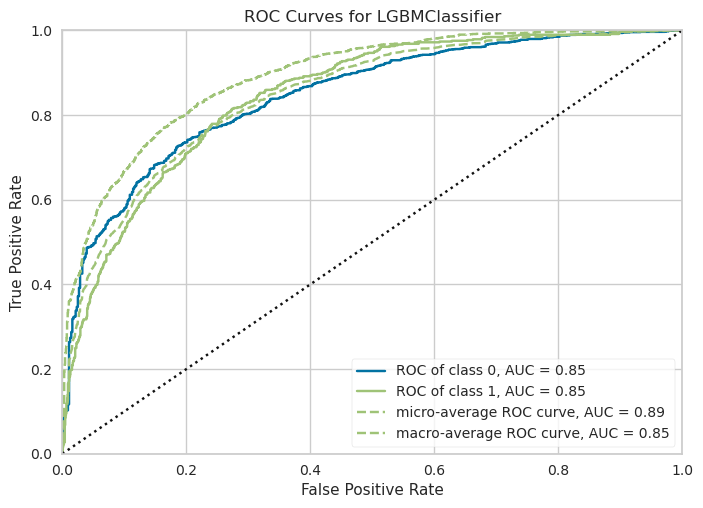

In [16]:
plot_model(tuned_lgbm, plot = 'auc')

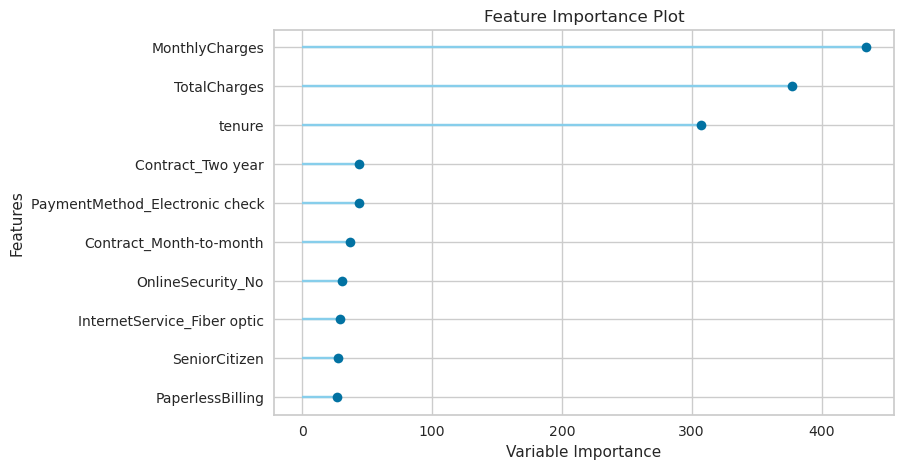

In [17]:
plot_model(tuned_lgbm, plot = 'feature')

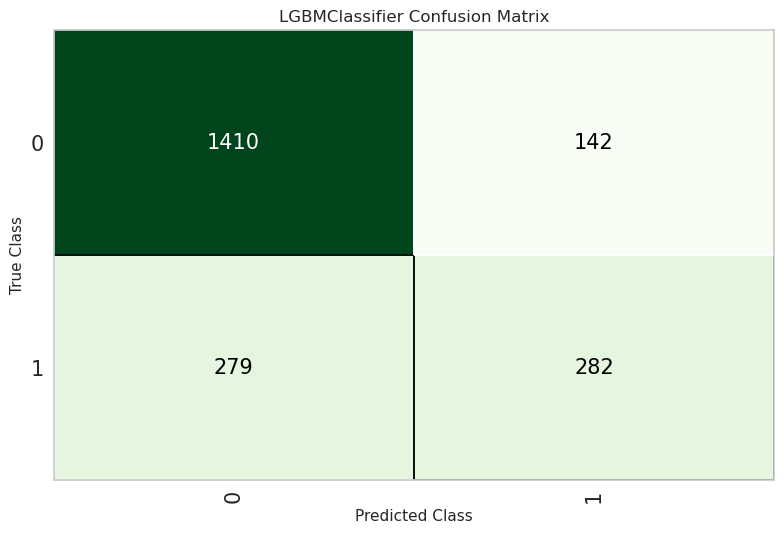

In [18]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

Hiperparametre ayarı yaparken kendisi elindeki set ile ilerlmesin de biz kendi parametre setimizi vermek istersek bunu da argüman olarak ekleyebiliriz. İşlemin uzamamsı için fold ve iterasyonu 3 veriyoruz. 

In [19]:
lgbm_params = {
    "max_depth": np.arange(2, 10),
    "learning_rate": [round(i,2) for i in np.linspace(0.0001, 0.2, num=100)],
    "colsample_bytree": [round(i,2) for i in np.linspace(0.5, 1, num=3)],
    "colsample_bynode": [round(i,2) for i in np.linspace(0.5, 1, num=3)],
    "num_leaves": np.arange(10, 100)
}

tuned_lgbm = tune_model(lgbm, custom_grid=lgbm_params, n_iter=3, fold=3)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


Modelimizi tamamladıktan sonra tahminlemek istediğimiz veri setini argüman olarak verip tahmin skorlarını içerisinden çıkarabiliriz.

In [20]:
preds = predict_model(tuned_lgbm, data = df.drop("customerID", axis=1))

In [21]:
preds

gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  ... StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  Churn  prediction_label  prediction_score
0     Female              0     Yes         No       1           No  No phone service             DSL             No          Yes  ...          No              No  Month-to-month              Yes           Electronic check         29.850       29.850      0                 1             0.597
1       Male              0      No         No      34          Yes                No             DSL            Yes           No  ...          No              No        One year               No               Mailed check         56.950     1889.500      0                 0             0.954
2       Male              0      No         No       2          Yes                No             DSL            Yes          Yes  ...          No              No  Month-to-month              Yes               Mailed check         53.850      108.150      1                 0             0.637
3       Male              0      No         No      45           No  No phone service             DSL            Yes           No  ...          No              No        One year               No  Bank transfer (automatic)         42.300     1840.750      0                 0             0.954
4     Female              0      No         No       2          Yes                No     Fiber optic             No           No  ...          No              No  Month-to-month              Yes           Electronic check         70.700      151.650      1                 1             0.736
...      ...            ...     ...        ...     ...          ...               ...             ...            ...          ...  ...         ...             ...             ...              ...                        ...            ...          ...    ...               ...               ...
7038    Male              0     Yes        Yes      24          Yes               Yes             DSL            Yes           No  ...         Yes             Yes        One year              Yes               Mailed check         84.800     1990.500      0                 0             0.901
7039  Female              0     Yes        Yes      72          Yes               Yes     Fiber optic             No          Yes  ...         Yes             Yes        One year              Yes    Credit card (automatic)        103.200     7362.900      0                 0             0.900
7040  Female              0     Yes        Yes      11           No  No phone service             DSL            Yes           No  ...          No              No  Month-to-month              Yes           Electronic check         29.600      346.450      0                 0             0.718
7041    Male              1     Yes         No       4          Yes               Yes     Fiber optic             No           No  ...          No              No  Month-to-month              Yes               Mailed check         74.400      306.600      1                 1             0.666
7042    Male              0      No         No      66          Yes                No     Fiber optic            Yes           No  ...         Yes             Yes        Two year              Yes  Bank transfer (automatic)        105.650     6844.500      0                 0             0.914

[7043 rows x 22 columns]

In [22]:
preds["prediction_label"]

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: prediction_label, Length: 7043, dtype: int64

# 4. Hiperparametre Optimizasyon Yöntemleri
**Optuna**
> Kurulum: pip install optuna

**HyperOpt**
> Kurulum: pip install hyperopt

Amacımızı hiperparametre kütüphanesini incelemek olduğundan feature engineering adımlarını atlıyoruz. Veriyi sadece encodeluyoruz. Bir bir feature engineering sonrası final olarak hiperparametre ayarı yapmak daha başarılı sonuçlar almanızı sağlayacaktır.

In [23]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity  ... DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No  ...               No          No          No              No  Month-to-month              Yes           Electronic check         29.850        29.850      0
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes  ...              Yes          No          No              No        One year               No               Mailed check         56.950      1889.500      0
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  ...               No          No          No              No  Month-to-month              Yes               Mailed check         53.850       108.150      1
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes  ...              Yes         Yes          No              No        One year               No  Bank transfer (automatic)         42.300      1840.750      0
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No  ...               No          No          No              No  Month-to-month              Yes           Electronic check         70.700       151.650      1

[5 rows x 21 columns]

In [24]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [25]:
from sklearn.preprocessing import LabelEncoder
df.drop("customerID", axis=1, inplace=True)

# Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)
    
    
    
# OHE    
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0       0              0        1           0       1             0                 1          29.850        29.850      0  ...                0                                0                0                                    0                    0                  0                  0   
1       1              0        0           0      34             1                 0          56.950      1889.500      0  ...                0                                0                0                                    0                    0                  1                  0   
2       1              0        0           0       2             1                 1          53.850       108.150      1  ...                0                                0                0                                    0                    0                  0                  0   
3       1              0        0           0      45             0                 0          42.300      1840.750      0  ...                1                                0                0                                    0                    0                  1                  0   
4       0              0        0           0       2             1                 1          70.700       151.650      1  ...                0                                0                0                                    0                    0                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                                      0                               1                           0  
1                                      0                               0                           1  
2                                      0                               0                           1  
3                                      0                               0                           0  
4                                      0                               1                           0  

[5 rows x 31 columns]

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## 4.1 Optuna

Dokümantasyon: [Optuna Documentation](https://optuna.readthedocs.io/en/stable/index.html)

Modeli LGBM ile kurmaya karar vermiş olalım ve bir LGBM modelini optimize etmeye çalışıyor olalım.

Optuna bizden bir objective fonksiyonu ister, bu fonksiyon içerisine optunanın denemesini istediğimiz parametre değerlerini ve aralıklarını yazıp study oluştururuz. Hangi yöne gitmesi gerektiğini Optuna kendisi bulacaktır. 

In [27]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def objective(trial):
    lgbm_params = dict(
    max_depth = trial.suggest_int("max_depth", 3, 20, log=True),
    early_stopping_round = trial.suggest_int("early_stopping_rounds", 10, 40, log=True),
    scale_pos_weight = trial.suggest_float("scale_pos_weight", 2, 15, log=True),
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
    num_iterations=1000,
    random_state=41,
    verbosity=-99)
    
    lgbm_model = LGBMClassifier(**lgbm_params).fit(X_train, y_train, eval_set=(X_test, y_test),
                                                  eval_metric="f1",verbose=-99)
    y_pred = lgbm_model.predict(X_test)
    score = f1_score(y_true = y_test, y_pred = y_pred)
    return score
    
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-04-26 11:38:42,647] A new study created in memory with name: no-name-dde53783-d2ac-40cd-a366-bc3c511e7be3
[I 2023-04-26 11:38:44,312] Trial 0 finished with value: 0.6651376146788991 and parameters: {'max_depth': 6, 'early_stopping_rounds': 21, 'scale_pos_weight': 2.550352113407303, 'learning_rate': 0.005729549955883725}. Best is trial 0 with value: 0.6651376146788991.
[I 2023-04-26 11:38:47,175] Trial 1 finished with value: 0.6567844925883695 and parameters: {'max_depth': 17, 'early_stopping_rounds': 19, 'scale_pos_weight': 2.4997365720273312, 'learning_rate': 0.004564049312589709}. Best is trial 0 with value: 0.6651376146788991.
[I 2023-04-26 11:38:47,339] Trial 2 finished with value: 0.655328798185941 and parameters: {'max_depth': 4, 'early_stopping_rounds': 19, 'scale_pos_weight': 4.194973871100331, 'learning_rate': 0.02566743995101921}. Best is trial 0 with value: 0.6651376146788991.
[I 2023-04-26 11:38:47,502] Trial 3 finished with value: 0.6309859154929578 and parameters:

In [28]:
# Bulunan en iyi parametreler
study.best_params

{'max_depth': 15,
 'early_stopping_rounds': 26,
 'scale_pos_weight': 3.4482152298589144,
 'learning_rate': 0.011714553822219892}

Optuna'ya denetmediğimiz ve sabit bıraktığımız değerler best_params içerisinde gelmez. Bu sabit değerleri de bizim eklememiz gerekir. 

In [29]:
params = study.best_params
params["num_iterations"] = 1000
params["random_state"] = 41
params["verbosity"] = -99
params

{'max_depth': 15,
 'early_stopping_rounds': 26,
 'scale_pos_weight': 3.4482152298589144,
 'learning_rate': 0.011714553822219892,
 'num_iterations': 1000,
 'random_state': 41,
 'verbosity': -99}

Final parametre setimiz yukarıda hazır olmuş oldu, bu parametrelerle model kurabiliriz.

In [30]:
lgb_final = LGBMClassifier(**params).fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric="f1", 
                                         verbose=-99)

[LightGBM] [Warning] early_stopping_round is set=26, early_stopping_rounds=26 will be ignored. Current value: early_stopping_round=26


In [31]:
# Final modelle tahmin yapmak istersek
lgb_final.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

Daha geniş bir parametre seti verelim. İşlemin uzamaması adına sadece 30 deneme yaptırıyoruz.

In [32]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def objective(trial):
    lgbm_params = dict(
    max_depth = trial.suggest_int("max_depth", 2, 30),
    early_stopping_round = trial.suggest_int("early_stopping_rounds", 2, 300),
    scale_pos_weight = trial.suggest_float("scale_pos_weight", 1, 15),
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.2),
    subsample = trial.suggest_float("subsample", 0.5, 1),
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1),
    colsample_bynode = trial.suggest_float("colsample_bynode", 0.5, 1),
    num_iterations= trial.suggest_int("num_iterations", 50, 2500),
    num_leaves = trial.suggest_int("num_leaves", 10, 500),
    n_jobs = -1,
    random_state=41,
    verbosity=-99)
    
    lgbm_model = LGBMClassifier(**lgbm_params).fit(X_train, y_train, eval_set=(X_test, y_test),
                                                  eval_metric="f1",verbose=-99)
    y_pred = lgbm_model.predict(X_test)
    score = f1_score(y_true = y_test, y_pred = y_pred)
    return score
    
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2023-04-26 11:41:41,330] A new study created in memory with name: no-name-8b5ff58f-f044-4357-b453-8fca3a780f6a
[I 2023-04-26 11:41:45,781] Trial 0 finished with value: 0.647571606475716 and parameters: {'max_depth': 26, 'early_stopping_rounds': 163, 'scale_pos_weight': 13.240557428279818, 'learning_rate': 0.0890554220909575, 'subsample': 0.7087166143250729, 'colsample_bytree': 0.9331410075234419, 'colsample_bynode': 0.6030250234659205, 'num_iterations': 777, 'num_leaves': 123}. Best is trial 0 with value: 0.647571606475716.
[I 2023-04-26 11:41:47,526] Trial 1 finished with value: 0.6386740331491713 and parameters: {'max_depth': 7, 'early_stopping_rounds': 181, 'scale_pos_weight': 3.075820300763234, 'learning_rate': 0.12813195113142672, 'subsample': 0.7598429324819763, 'colsample_bytree': 0.7549060820914417, 'colsample_bynode': 0.9486164180389043, 'num_iterations': 1599, 'num_leaves': 258}. Best is trial 0 with value: 0.647571606475716.
[I 2023-04-26 11:41:51,940] Trial 2 finished wi

In [33]:
# denetmediğimiz parametreleri de ekleyelim
params = study.best_params
params["n_jobs"] = -1
params["random_state"] = 41
params["verbosity"] = -99
params

{'max_depth': 8,
 'early_stopping_rounds': 148,
 'scale_pos_weight': 12.576487901272802,
 'learning_rate': 0.12053014541411272,
 'subsample': 0.9428549413216811,
 'colsample_bytree': 0.9137887063144967,
 'colsample_bynode': 0.7488274464686316,
 'num_iterations': 1002,
 'num_leaves': 226,
 'n_jobs': -1,
 'random_state': 41,
 'verbosity': -99}

In [34]:
# Final model
lgb_final = LGBMClassifier(**params).fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric="f1", 
                                         verbose=-99)

[LightGBM] [Warning] early_stopping_round is set=148, early_stopping_rounds=148 will be ignored. Current value: early_stopping_round=148


## 2. HyperOpt